In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Model compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8577 - loss: 0.4911 - val_accuracy: 0.9611 - val_loss: 0.1354
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9543 - loss: 0.1575 - val_accuracy: 0.9693 - val_loss: 0.1023
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9673 - loss: 0.1081 - val_accuracy: 0.9742 - val_loss: 0.0839
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9724 - loss: 0.0886 - val_accuracy: 0.9738 - val_loss: 0.0838
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9769 - loss: 0.0741 - val_accuracy: 0.9772 - val_loss: 0.0735
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9805 - loss: 0.0631 - val_accuracy: 0.9774 - val_loss: 0.0708
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9816 - loss: 0.0569 - val_accuracy: 0.9792 - val_loss: 0.0675
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9838 - loss: 0.0

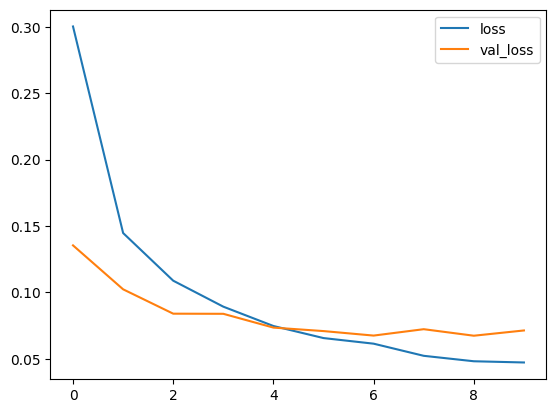

In [6]:
# Narysuj loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

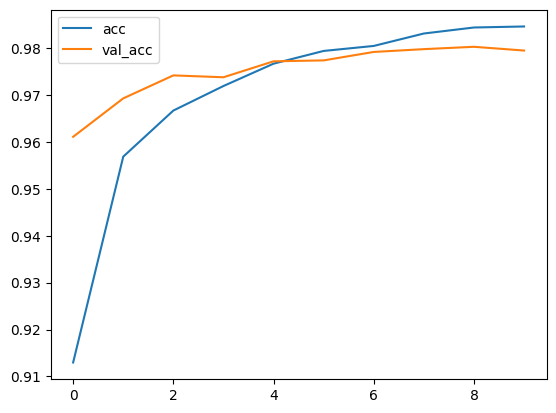

In [7]:
# Accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
print(model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0838
[0.07130704075098038, 0.9794999957084656]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix bez normalizacji
[[ 973    0    0    1    1    1    2    1    1    0]
 [   0 1128    3    1    0    1    1    0    1    0]
 [   4    3 1015    1    1    0    0    5    3    0]
 [   0    1    9  986    0    5    0    5    2    2]
 [   4    0    2    0  962    0    5    3    1    5]
 [   2    1    0    8    2  871    3    3    2    0]
 [   5    3    2    1    8    2  936    0    1    0]
 [   0    5    8    0    0    0    0 1012    2    1]
 [   7    0    7    4    6    6    0    4  938    2]
 [   3    4    1    4   13    2    0    7    1  974]]


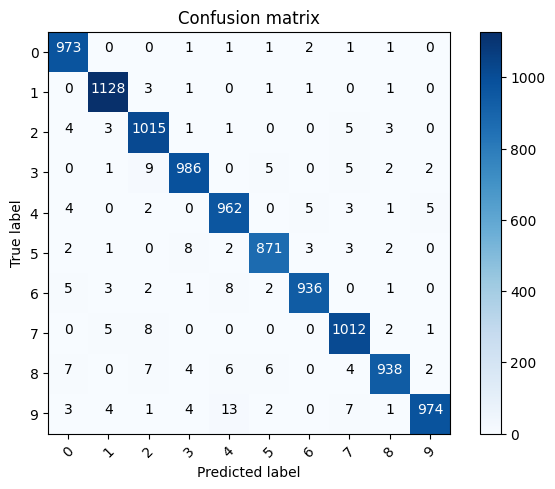

In [9]:
# Kod odpowiedzialny za Confusion Matrix
# Łatwo pomylić 7 z 2
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Znormalizowane confusion matrix")
  else:
      print('Confusion matrix bez normalizacji')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

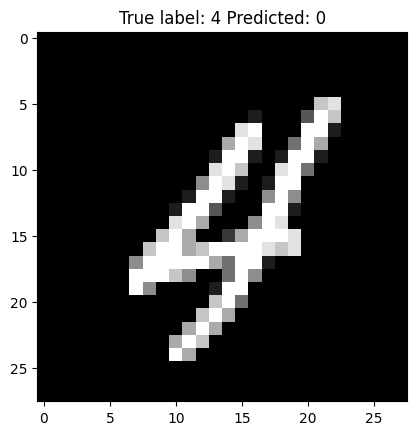

In [10]:
# Pokaż przykład błędu w klasyfikacji
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));